# Import packages

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import data bases

In [187]:

df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

In [188]:
df.shape

(329064, 90)

In [193]:
df[['mt_dec_cum_IMP_tot','EAD_1an_avant_def','cum_frs_externes','fl_prise_de_gar', 'cum_rec', 'fam_ETH', 'CD_DNE_CHR_LGD_SAIN']]

mt_dec_cum_IMP_tot  EAD_1an_avant_def  cum_frs_externes  \
0                      0.0            1121.38           5295.06   
1                      0.0            1121.38           5295.06   
2                      0.0            1121.38           5295.06   
3                      0.0            1121.38           5295.06   
4                      0.0            1121.38           5295.06   
...                    ...                ...               ...   
329059                 0.0           50840.00              0.00   
329060                 0.0           50840.00              0.00   
329061                 0.0          161542.33              0.00   
329062                 0.0          161542.33              0.00   
329063                 0.0          158445.75              0.00   

        fl_prise_de_gar  cum_rec  fam_ETH  CD_DNE_CHR_LGD_SAIN  
0                     0  4173.79        0                  2.0  
1                     0  4173.79        0                  2.0  
2                     0  4173.79        0                  2.0  
3                     0  4173.79        0                  2.0  
4                     0  4173.79        0                  2.0  
...                 ...      ...      ...                  ...  
329059                0     0.00        0                  2.0  
329060                0     0.00        0                  2.0  
329061                0     0.00        0                  1.0  
329062                0     0.00        0                  1.0  
329063                0     0.00        1                  3.0  

[329064 rows x 7 columns]

## analyse des types de var

In [61]:
df.select_dtypes(include = 'object').shape[1]

20

In [62]:
df.select_dtypes(include = 'float').shape[1]

44

In [63]:
df.select_dtypes(include = 'int').shape[1]

26

# Valeurs manquantes

In [64]:
df_temp = df.drop_duplicates(subset = 'cd_op', keep = 'last')

In [65]:
df_temp.shape

(23305, 90)

In [66]:
df_temp.isna().sum()/df_temp.shape[0]>0.4

cd_op                 False
date_entree_defaut    False
date_sortie_defaut     True
arrete                False
fl_pass_DET           False
                      ...  
PTG                   False
AGE_EMP1              False
AGE_EMP2               True
TX_ENDET              False
MT_REST_VIVRE         False
Length: 90, dtype: bool

# To do list

Analyse exploratoire : distrib var quali/quanti, visualisation NaN, corrélations, doublons, outliers

Analyse + profonde : que prédire, quelles vars sont pertinentes, diff entre les 2 df, liste questions à poser

Axel : distrib quanti, correlations, outliers

Baheux : distrib quali ,NaN , doublons

### Interrogations :
Faut-il ne garder que la dernière ligne de chaque individu, correspondant à sa sortie de defaut ou bien à son DET pour faire un logit? Ou bien doit on garder toutes les observations au risque d'avoir trop peu de 0 et donc de moins bien classifier?

Penser au problème de troncature/censure des données (faut il supprimer les individus dont le dossier est encore en cours?)

(23305, 65)

### Conversion des dates en datetime

In [223]:
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'])

df['arrete'] = pd.to_datetime(df['arrete'])

df['dt_arr_last_enc_ope'] = pd.to_datetime(df['dt_arr_last_enc_ope'])
df['dt_arr_1st_enc_ope'] = pd.to_datetime(df['dt_arr_1st_enc_ope'])

df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')


df['dtHJD_prov'] = pd.to_datetime(df['dtHJD_prov'])
df['dtHJD_def'] = pd.to_datetime(df['dtHJD_def'])

df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'])

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\637034505.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\637034505.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\637034505.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\637034505.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a f

In [224]:
condition = (df.drop_duplicates(subset = 'cd_op').select_dtypes(exclude = 'object').isna().sum()/len(df.drop_duplicates(subset = 'cd_op'))<0.4)
df_temp = df.drop_duplicates(subset = 'cd_op').select_dtypes(exclude = 'object').loc[:,condition]
df_temp = df_temp.select_dtypes(exclude = 'datetime')

df_temp.drop(columns = ['cum_dec','cum_rec', 'MR_arr'],inplace = True)

df_temp.columns

Index(['ANC_BANC_MAX_PFI', 'CD_POST_BIEN_PFI', 'MT_PATRIM_MOB',
       'MT_CHA_HORS_OPE_PFI', 'NB_CHARGE_HORS_OPE_PFI', 'MT_PATRIM_NET',
       'MT_REV_PFI', 'NB_DUR_PFI', 'TX_APPOR', 'MT_CHA_CSM_REV', 'MT_CHA_IMP',
       'MT_CHA_PIP', 'MT_CHA_PIV', 'cum_frs_externes', 'MT_EAD_RESID',
       'MT_EAD_DNE_CHR_d', 'CD_MTF_ENE_CTX', 'dls_mep_entree_def',
       'nb_bienHOP', 'ANC_PRO_MAX_PFI', 'max_age_ctx', 'MT_FMG',
       'mt_dec_cum_IMP_tot', 'MT_CHG_MSL', 'mt_rev_dispo', 'EAD_1an_avant_def',
       'dls_ges_def', 'AGE_EMP1', 'TX_ENDET', 'MT_REST_VIVRE'],
      dtype='object')

# Types des var cat

In [225]:
filtre = (df.select_dtypes(include = 'number').nunique()<10)
for col in df.select_dtypes(include = 'number').loc[:,filtre].columns:
    df[col] = df[col].astype('object')

# Analyse préliminaire

In [226]:
df_obj = df.drop_duplicates(subset = 'cd_op',keep = 'last').drop(columns = ['CD_NAT_EMP2']).select_dtypes(include='object').drop(columns = 'cd_op').copy()

In [228]:
for col in df_obj.columns:
    print(f"{col} : {df_obj[col].nunique()}")

fl_pass_DET : 2
nb_prt : 7
CD_NAT_EMP1 : 5
CD_DEST_PFI : 7
CD_NATUR_OP_PFI : 18
FL_REL_NON_ANNULE : 2
FL_ETR : 2
CD_ETAT_CIVIL : 9
CD_CSP_EMP1 : 16
CD_CSP_EMP2 : 17
CD_SITFAM_EMP1 : 7
CD_SITFAM_EMP2 : 8
NB_RP_HOP : 7
NB_RS_HOP : 8
CD_DNE_CHR_LGD_SAIN : 5
fl_prise_de_gar : 2
fl_fam_vam : 2
fam_ETH : 2
fam_ENQ : 2
fam_exp : 2
fam_hyp : 2
fam_sim : 2
fam_AEP : 2
dat_dec_echec : 2
solution : 2
fam_PCD : 2
sol_echec : 4
niv_gravite_mtf_dne : 3
CD_MTF_DFC : 20
niv_gravite_mtf_dfs : 3
no_pass_def : 5
nb_empr_ope : 7
fl_def_ss_pass_CTX : 2
fl_prt_Conso : 2
fl_fonc : 2
regroup_natur_op : 4
AMI : 2
EXE : 2
PTG : 2
MTF : 2


In [229]:
df.drop_duplicates(subset = 'cd_op', keep = 'last')['fl_pass_DET'].value_counts()

fl_pass_DET
0    15842
1     7463
Name: count, dtype: int64

In [230]:
df.head(50)

cd_op date_entree_defaut date_sortie_defaut     arrete fl_pass_DET  \
0   I860708600         2017-01-16                NaT 2017-01-31           0   
1   I860708600         2017-01-16                NaT 2017-02-28           0   
2   I860708600         2017-01-16                NaT 2017-03-31           0   
3   I860708600         2017-01-16                NaT 2017-04-30           0   
4   I860708600         2017-01-16                NaT 2017-05-31           0   
5   I860708600         2017-01-16                NaT 2017-06-30           0   
6   I860708600         2017-01-16                NaT 2017-07-31           0   
7   I860708600         2017-01-16                NaT 2017-08-31           0   
8   I860708600         2017-01-16                NaT 2017-09-30           0   
9   I860708600         2017-01-16                NaT 2017-10-31           0   
10  I860708600         2017-01-16                NaT 2017-11-30           0   
11  I860708600         2017-01-16         2017-12-12 2017-12-31           0   
12  I950404213         2017-03-15                NaT 2017-03-31           0   
13  I950404213         2017-03-15                NaT 2017-04-30           0   
14  I950404213         2017-03-15                NaT 2017-05-31           0   
15  I950404213         2017-03-15                NaT 2017-06-30           0   
16  I950404213         2017-03-15                NaT 2017-07-31           0   
17  I950404213         2017-03-15                NaT 2017-08-31           0   
18  I950404213         2017-03-15                NaT 2017-09-30           0   
19  I950404213         2017-03-15                NaT 2017-10-31           0   
20  I950404213         2017-03-15                NaT 2017-11-30           0   
21  I950404213         2017-03-15                NaT 2017-12-31           0   
22  I950404213         2017-03-15                NaT 2018-01-31           0   
23  I950404213         2017-03-15                NaT 2018-02-28           0   
24  I950404213         2017-03-15         2018-03-13 2018-03-31           0   
25  I950706618         2016-01-28                NaT 2016-08-31           0   
26  I950706618         2016-01-28                NaT 2016-09-30           0   
27  I950706618         2016-01-28                NaT 2016-10-31           0   
28  I950706618         2016-01-28                NaT 2016-11-30           0   
29  I950706618         2016-01-28                NaT 2016-12-31           0   
30  I950706618         2016-01-28                NaT 2017-01-31           0   
31  I950706618         2016-01-28                NaT 2017-02-28           0   
32  I950706618         2016-01-28                NaT 2017-03-31           0   
33  I950706618         2016-01-28                NaT 2017-04-30           1   
34  I950901248         2017-01-27                NaT 2017-01-31           0   
35  I950901248         2017-01-27                NaT 2017-02-28           0   
36  I950901248         2017-01-27                NaT 2017-03-31           0   
37  I950901248         2017-01-27                NaT 2017-04-30           0   
38  I950901248         2017-01-27                NaT 2017-05-31           0   
39  I950901248         2017-01-27         2017-12-06 2017-06-30           0   
40  I960300578         2016-06-28                NaT 2016-06-30           0   
41  I960300578         2016-06-28         2016-06-07 2016-07-31           0   
42  I960600754         2016-07-01                NaT 2016-01-31           0   
43  I960600754         2016-07-01                NaT 2016-02-29           0   
44  I960600754         2016-07-01                NaT 2016-03-31           0   
45  I960600754         2016-07-01                NaT 2016-04-30           0   
46  I960600754         2016-07-01                NaT 2016-05-31           0   
47  I960600754         2016-07-01         2016-01-06 2016-06-30           0   
48  I960701644         2016-03-03                NaT 2016-03-31           0   
49  I960701644         2016-03-03                NaT 2016-0

- On a 23 305 individus sur l'ensemble de la période
- 7463 d'entre eux sont passés en DET
- Le reste a remboursé le défaut


# Analyse var quali sur dataframe total

In [231]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Définir le nombre de graphiques par ligne
graphs_per_row = 3

# Calculer le nombre total de lignes nécessaires
num_rows = -(-len(df_obj.columns) // graphs_per_row)  # Utilise la division entière vers le haut

# Créer une grille de sous-graphiques
fig = make_subplots(rows=num_rows, cols=graphs_per_row, subplot_titles=df_obj.columns)

for i, col in enumerate(df_obj.columns):
    category_counts = df_obj[col].value_counts().reset_index()
    category_counts.columns = ['Catégorie', 'Fréquence']

    # Création du diagramme à barres avec Plotly Express
    bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title=col,
                     labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

    # Ajout du graphique à la grille
    row = i // graphs_per_row + 1
    col = i % graphs_per_row + 1
    fig.add_trace(bar_fig.data[0], row=row, col=col)

# Mettre à jour la mise en page
fig.update_layout(height=num_rows * 200, width=graphs_per_row * 400, title_text="Graphiques par colonne")
fig.show()


# Distributions des var quanti

In [54]:
from plotly.subplots import make_subplots

# Définir le nombre de graphiques par ligne
#graphs_per_row = 3

#df_num = df.drop(columns = ['NB_RP_HOP', 'mt_inscrip_devant_CL_afr', 'valeur_bien_afr',
#'CD_CSP_EMP2', 'LTV_actu', 'NB_LO_HOP', 
#'LTVnonactu_1an_avant_def', 'NB_RS_HOP',
#'dispo_HP_afr', 'CD_NAT_EMP2', 'dtHJD_prov',
#'dtHJD_def', 'dtSRT1st', 'AGE_EMP2', 'CD_SITFAM_EMP2'])
#float_columns = df_num.select_dtypes(include='float').columns
#
#num_cols = 3
#num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs
#
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
#
#fig.subplots_adjust(hspace=0.5)
#
#axes = axes.flatten()
#
#for i, col in enumerate(float_columns):
#    sns.kdeplot(x=df[col], ax=axes[i], fill=True)
#    axes[i].set_title(f'Kernel Plot de {col}')
#
#plt.show()

# Stabilité des catégories dans le tps par rapport à la target 

In [17]:
df

cd_op date_entree_defaut date_sortie_defaut     arrete  \
0       I860708600         2017-01-16                NaT 2017-01-31   
1       I860708600         2017-01-16                NaT 2017-02-28   
2       I860708600         2017-01-16                NaT 2017-03-31   
3       I860708600         2017-01-16                NaT 2017-04-30   
4       I860708600         2017-01-16                NaT 2017-05-31   
...            ...                ...                ...        ...   
329059  M220505830         2022-06-16                NaT 2022-11-30   
329060  M220505830         2022-06-16                NaT 2022-12-31   
329061  M220606878         2022-04-11                NaT 2022-11-30   
329062  M220606878         2022-04-11                NaT 2022-12-31   
329063  M220631441         2022-12-12                NaT 2022-12-31   

        fl_pass_DET  nb_prt DT_MEP_OPE CD_NAT_EMP1 CD_NAT_EMP2  \
0                 0       1 1986-09-15         NaN         NaN   
1                 0       1 1986-09-15         NaN         NaN   
2                 0       1 1986-09-15         NaN         NaN   
3                 0       1 1986-09-15         NaN         NaN   
4                 0       1 1986-09-15         NaN         NaN   
...             ...     ...        ...         ...         ...   
329059            0       1 2022-06-16         FRA         FRA   
329060            0       1 2022-06-16         FRA         FRA   
329061            0       1 2022-07-21         FRA         FRA   
329062            0       1 2022-07-21         FRA         FRA   
329063            0       1 2022-09-30         FRA         NaN   

        ANC_BANC_MAX_PFI  ... EAD_1an_avant_def LTVnonactu_1an_avant_def  \
0                    NaN  ...           1121.38                      NaN   
1                    NaN  ...           1121.38                      NaN   
2                    NaN  ...           1121.38                      NaN   
3                    NaN  ...           1121.38                      NaN   
4                    NaN  ...           1121.38                      NaN   
...                  ...  ...               ...                      ...   
329059             301.0  ...          50840.00                 1.016800   
329060             301.0  ...          50840.00                 1.016800   
329061             369.0  ...         161542.33                 0.694059   
329062             369.0  ...         161542.33                 0.694059   
329063              71.0  ...         158445.75                 1.320381   

        dls_ges_def  AMI  EXE  PTG  AGE_EMP1  AGE_EMP2  TX_ENDET  \
0                 0  NaN  NaN  NaN        74      78.0       NaN   
1                 1  NaN  NaN  NaN        75      78.0       NaN   
2                 2  NaN  NaN  NaN        75      78.0       NaN   
3                 3  NaN  NaN  NaN        75      78.0       NaN   
4                 4  NaN  NaN  NaN        75      78.0       NaN   
...             ...  ...  ...  ...       ...       ...       ...   
329059            5  NaN  NaN  NaN        55      41.0     20.91   
329060            6  NaN  NaN  NaN        55      41.0     20.91   
329061            0  NaN  NaN  NaN        51      55.0     17.40   
329062            1  NaN  NaN  NaN        51      55.0     17.40   
329063            0  0.0  0.0  0.0        27       NaN     32.25   

        MT_REST_VIVRE  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
329059         2341.0  
329060         2341.0  
329061         4003.0  
329062         4003.0  
329063         1399.0  

[329064 rows x 90 columns]

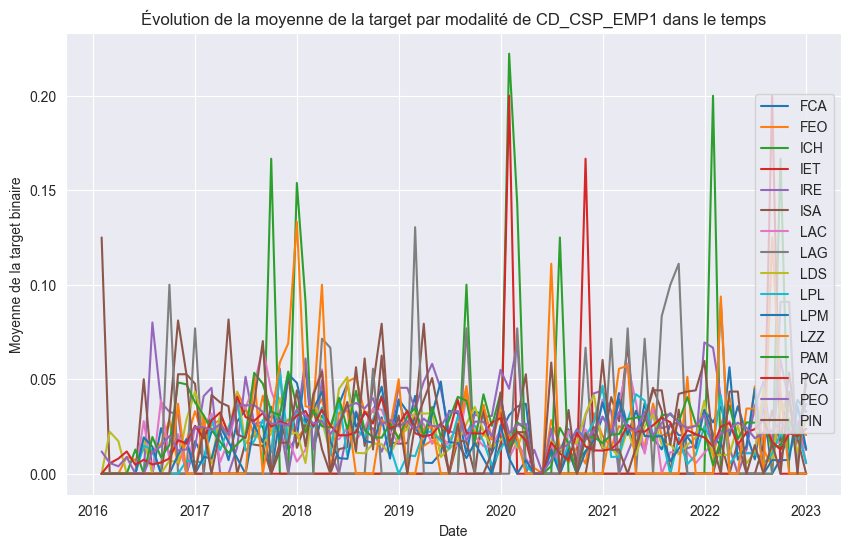

In [18]:
import matplotlib.pyplot as plt

for col in df[['CD_CSP_EMP1']].columns:#.select_dtypes(include = 'object').columns:
    # Calcul de la moyenne par groupe (genre et date)
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
    
    # Tracé des données
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    # Ajout de légendes et labels
    ax.legend(loc = 'right')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de la target binaire')
    ax.set_title(f'Évolution de la moyenne de la target par modalité de {col} dans le temps')
    
    # Affichage du graphique
    plt.show()


# Analyse dépendances temporelles

In [21]:
var_to_categorize = [
    "fl_pass_DET",
    "CD_POST_BIEN_PFI",
    "FL_REL_NON_ANNULE",
    "FL_ETR",
    "CD_ETAT_CIVIL",
    "CD_DNE_CHR_LGD_SAIN",
    "fl_prise_de_gar",
    "fl_fam_vam",
    "fam_ETH",
    "fam_ENQ",
    "fam_exp",
    "fam_hyp",
    "fam_sim",
    "fam_AEP",
    "dat_dec_echec",
    "solution",
    "fam_PCD",
    "CD_MTF_ENE_CTX",
    "niv_gravite_mtf_dne",
    "niv_gravite_mtf_dfs",
    "no_pass_def",
    "fl_def_ss_pass_CTX",
    "fl_prt_Conso",
    "fl_fonc",
    "AMI",
    "EXE",
    "PTG"
]

for var in var_to_categorize : 
    df[var] = df[var].astype("object")

In [22]:
liste= []
for col in df.select_dtypes(include = 'number').columns:
    if df[col].nunique()>20:
        liste.append(col)

In [ ]:
import matplotlib.pyplot as plt

grouped_df = df.iloc[:10,:].groupby('cd_op')

for cd_op, group in grouped_df:
    
    plt.figure()
    
    for col in group[liste].columns:
        plt.plot(group['arrete'], group[col], label=col)
    
    plt.xlabel('arrete')
    plt.ylabel('Valeur')
    plt.title(f'Evolution des variables pour cd_op={cd_op}')
    plt.legend('off')
    
    plt.show()

In [47]:
df.iloc[:500,:].shape

(500, 90)

In [53]:
var_temporelles = []
for indiv in df.iloc[:10000,:]['cd_op'].unique():
    df_temp = df[df['cd_op'] == indiv]
    for col in df_temp.select_dtypes(exclude = 'datetime').columns:
        if df_temp[col].nunique()>2:
            var_temporelles.append(col)
        else:
            pass
var_temporelles = list(set(var_temporelles))
var_temporelles   

['AGE_EMP2',
 'cum_frs_externes',
 'AGE_EMP1',
 'MT_CHG_MSL',
 'mt_rev_dispo',
 'cum_dec',
 'sol_echec',
 'MT_EAD_RESID',
 'MR_arr',
 'dls_ges_def',
 'cum_rec',
 'mt_dec_cum_IMP_tot']

# Feature engineering 
### CD_CSP_EMP1

In [68]:
df_doubl = df.copy()
df = df.drop_duplicates(subset = 'cd_op',keep = 'last')
df.shape

(23305, 90)

In [69]:
precaire = ['IET' , 'LPM']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'CSP ayant une faible proportion de DET', 'CSP ayant une haute proportion de DET')


In [26]:
# Définir les catégories de regroupement
categories_aisés = ['IET' , 'LPM']
categories_moyens = ['PEO']  
categories_pauvres = ['ICH', 'IET', 'ISA', 'LAC', 'LAG', 'PIN','FEO', 'LZZ', 'PAM', 'PCA','FCA', 'FIN', 'IRE', 'LDS', 'LPL']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df['Catégorie'] = np.select(
    [
        df['CD_CSP_EMP1'].isin(categories_aisés),
        df['CD_CSP_EMP1'].isin(categories_moyens),
        df['CD_CSP_EMP1'].isin(categories_pauvres)
    ],
    ['Aisés', 'Moyens', 'Pauvres'],
    default='Autre'
)

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\963482551.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



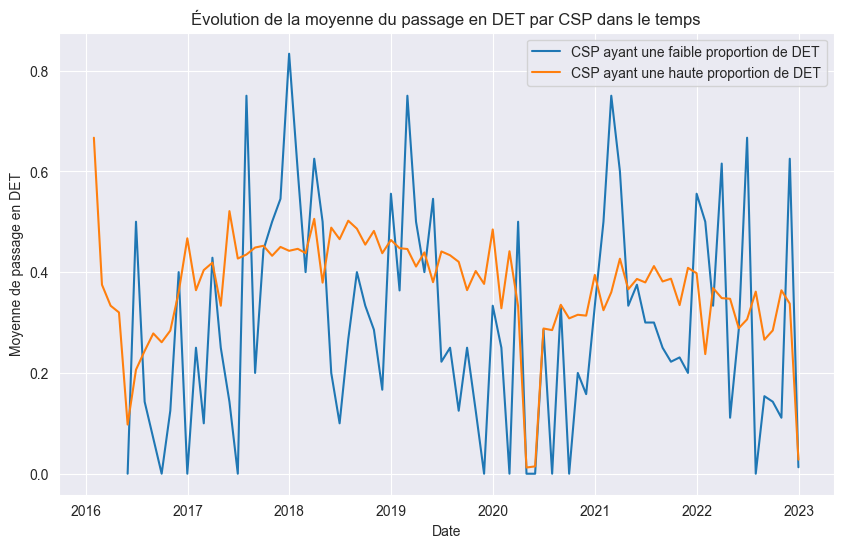

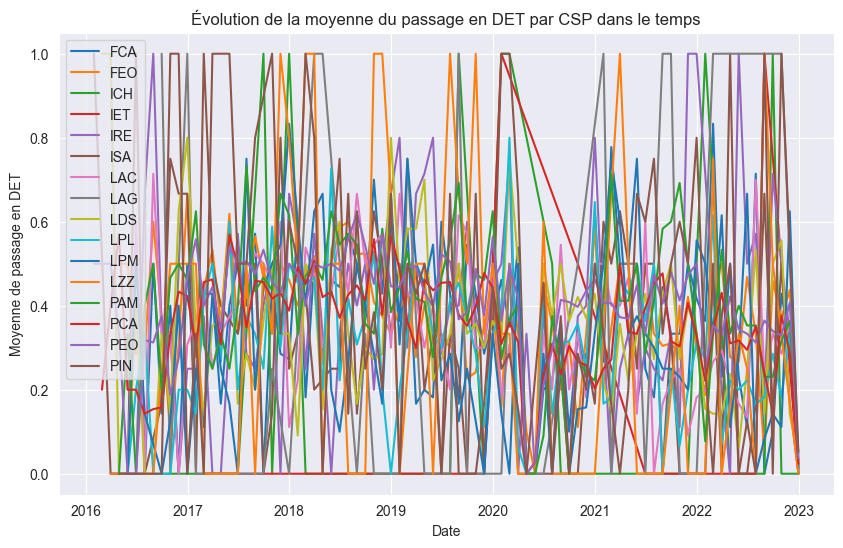

In [27]:
import matplotlib.pyplot as plt

for col in df[['CSP','CD_CSP_EMP1']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par CSP dans le temps')
 
    plt.show()


In [28]:
list_mean = []
for cat in df['CD_CSP_EMP1'].unique():
    moyenne = df[df['CD_CSP_EMP1']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
CSP = pd.DataFrame(list_mean)
CSP['CSP'] = df['CD_CSP_EMP1'].unique()
CSP

0  CSP
0   0.292958  ISA
1   0.350590  PEO
2   0.308180  PCA
3   0.321584  FEO
4   0.317661  FCA
5   0.290909  LDS
6   0.349575  PAM
7   0.290441  LAC
8   0.251682  LPM
9   0.266541  LPL
10  0.262500  LAG
11  0.323457  PIN
12  0.315508  LZZ
13  0.142857  IET
14  0.272727  ICH
15  0.331439  IRE

### CD_MTF_DFC


In [29]:
list_mean = []
for cat in df['CD_MTF_DFC'].unique():
    moyenne = df[df['CD_MTF_DFC']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_MTF_DFC'].unique()
motif

0 Motif defaut
0   0.423913          SEP
1   0.444867          SUR
2   0.295699          BDF
3   0.016466          YYY
4   0.488673          MOR
5   0.291375          AUT
6   0.574511          DEC
7   0.326227          DI1
8        NaN          NaN
9   0.440252          RIS
10  0.261905          PCL
11  0.333333          CON
12  0.463958          DIV
13  0.474860          CHO
14  0.391393          SAN
15  0.770642          REL
16  0.740741          ORG
17  0.160377          PCT
18  0.666667          PPE
19  0.538462          SIN
20  1.000000          ESC

In [30]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\1415125859.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



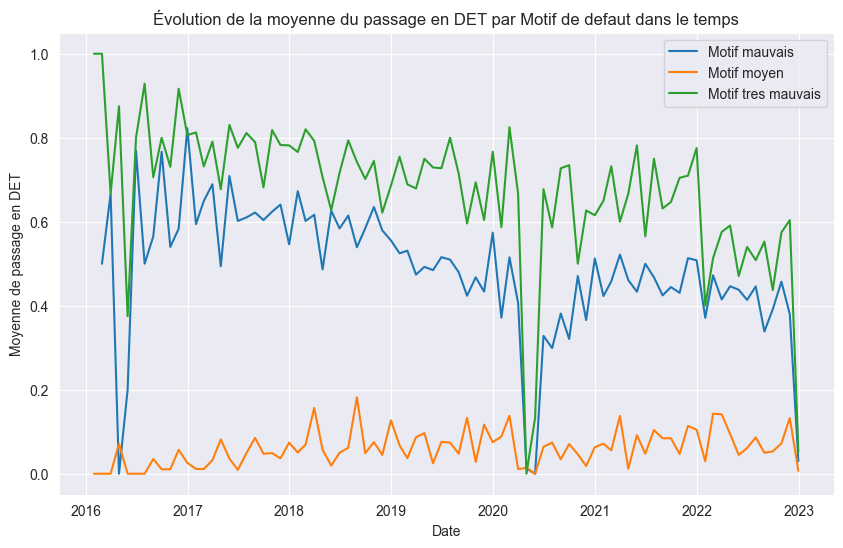

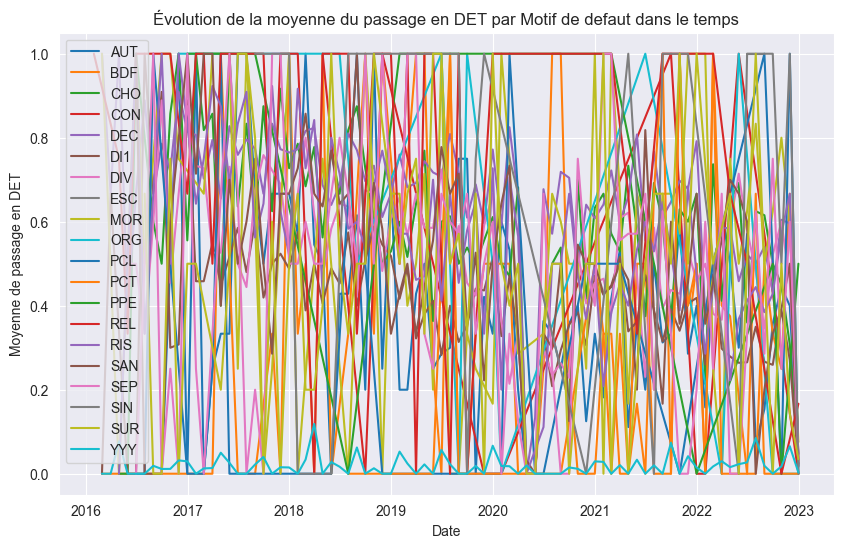

In [31]:
import matplotlib.pyplot as plt

for col in df[['Motif','CD_MTF_DFC']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()


In [32]:
# Supposons que 'Motif' soit le nom de la colonne contenant les catégories
category_counts = df['Motif'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

# Création du diagramme à barres avec Plotly Express
bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show()  # Correction : Utilisation de la méthode show() pour afficher la figure


# CD_NATUR_OP_PFI

In [70]:
list_mean = []
for cat in df['CD_NATUR_OP_PFI'].unique():
    moyenne = df[df['CD_NATUR_OP_PFI']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_NATUR_OP_PFI'].unique()
motif

0 Motif defaut
0   0.292713          TVX
1   0.339903          AQA
2   0.341605          AQN
3   0.280410          ACO
4   0.323504          ATV
5   0.269547          CON
6   0.255523          RAC
7   0.334320          SOU
8   0.284483          TRC
9   0.411215          ARA
10  0.279070          RSO
11  0.416667          ACR
12  0.375000          COR
13  0.166667          ARN
14  0.380952          ATR
15  0.216216          TSO
16  0.117647          ZZZ
17  0.384615          SCP

In [94]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

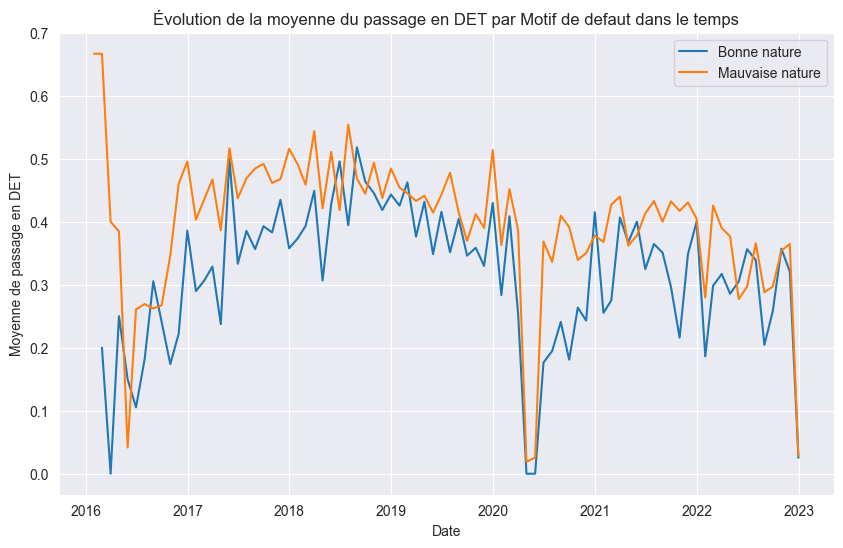

In [95]:
for col in df[['Nature']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()



In [96]:
# Supposons que 'Motif' soit le nom de la colonne contenant les catégories
category_counts = df['Nature'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

# Création du diagramme à barres avec Plotly Express
bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show()  # Correction : Utilisation de la méthode show() pour afficher la figure


# CD_SITFAM_EMP1

In [97]:
list_mean = []
for cat in df['CD_SITFAM_EMP1'].unique():
    moyenne = df[df['CD_SITFAM_EMP1']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_SITFAM_EMP1'].unique()
motif

0 Motif defaut
0  0.286272            U
1  0.298766            M
2  0.358103            C
3  0.286996            V
4  0.360096            D
5  0.298507            S
6  0.365517            I

In [98]:
precaire = ['I','D','C']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

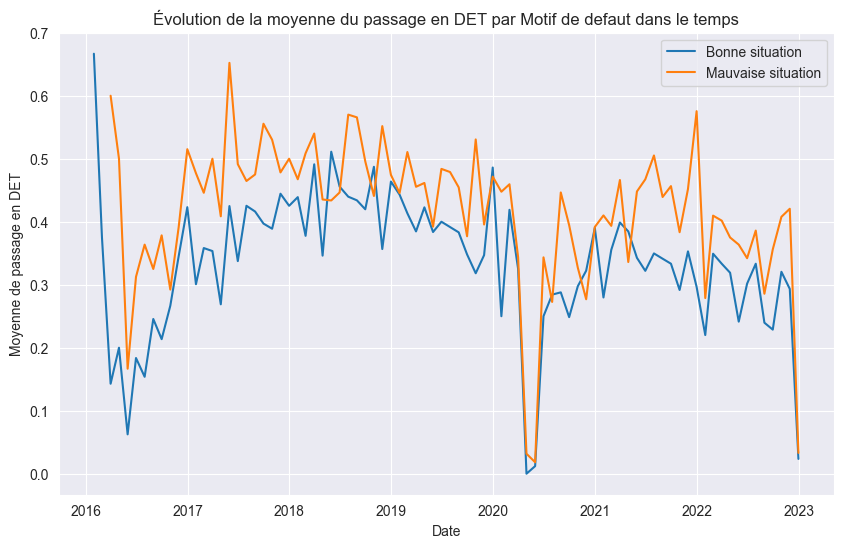

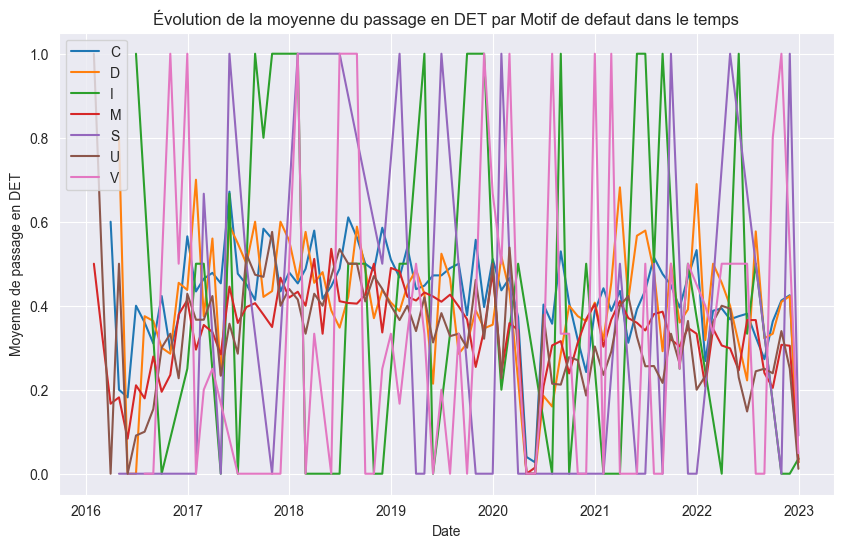

In [99]:
for col in df[['Situation_fam','CD_SITFAM_EMP1']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()



In [100]:
# Supposons que 'Motif' soit le nom de la colonne contenant les catégories
category_counts = df['Situation_fam'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

# Création du diagramme à barres avec Plotly Express
bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show()  # Correction : Utilisation de la méthode show() pour afficher la figure


# CD_DEST_PFI

In [101]:
list_mean = []
for cat in df['CD_DEST_PFI'].unique():
    moyenne = df[df['CD_DEST_PFI']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_DEST_PFI'].unique()
motif

0 Motif defaut
0  0.500000           XX
1  0.330600           RP
2  0.303566           LO
3  0.282582           RS
4       NaN          NaN
5  0.263889           ZZ
6  0.230769           MI
7  0.500000           PR

In [106]:
precaire = ['XX', 'PR', 'RP']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Destination_bien'] = np.where(df['CD_DEST_PFI'].isin(precaire), 'Mauvaise destination', 'Bonne destination')

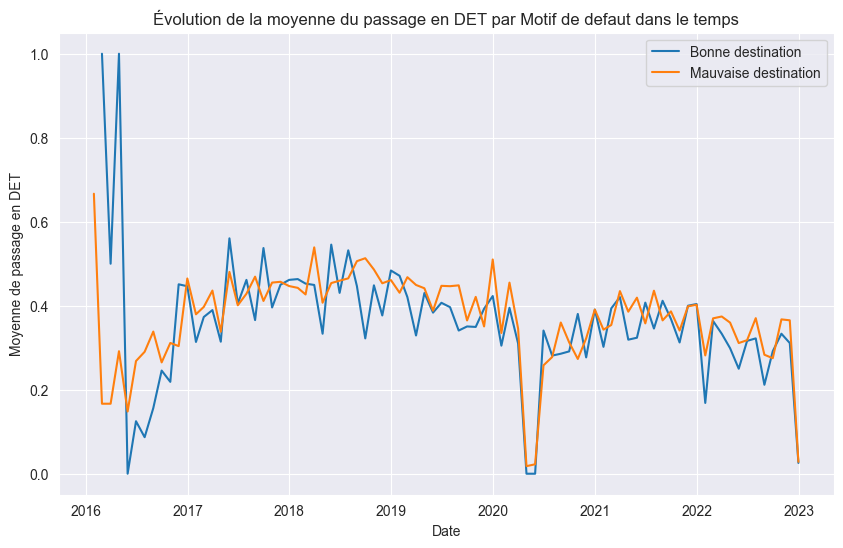

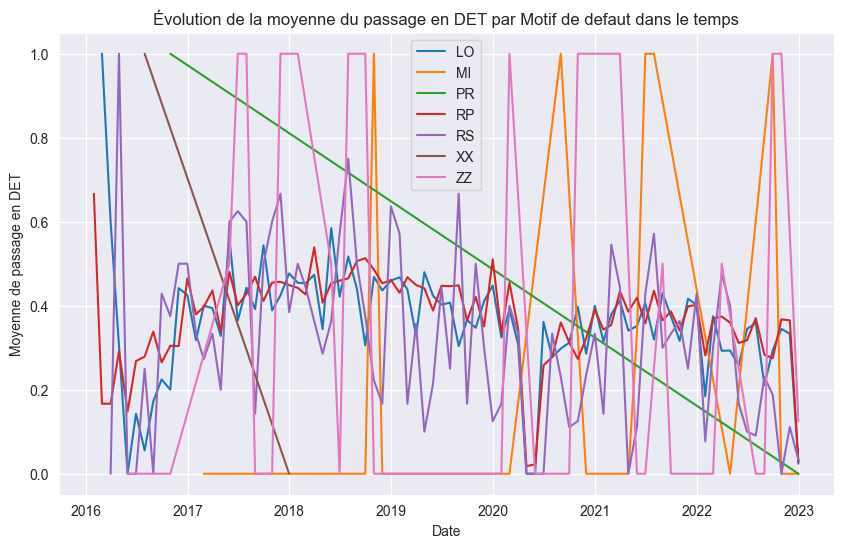

In [110]:
for col in df[['Destination_bien','CD_DEST_PFI']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()



In [108]:
category_counts = df['Destination_bien'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show() 


# 'sol_echec'

In [111]:
list_mean = []
for cat in df['sol_echec'].unique():
    moyenne = df[df['sol_echec']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['sol_echec'].unique()
motif

0 Motif defaut
0  0.124637          0_0
1  0.736831          0_1
2  0.080253          1_0
3  0.371057          1_1

In [160]:
precaire = ['0_1', '1_1']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

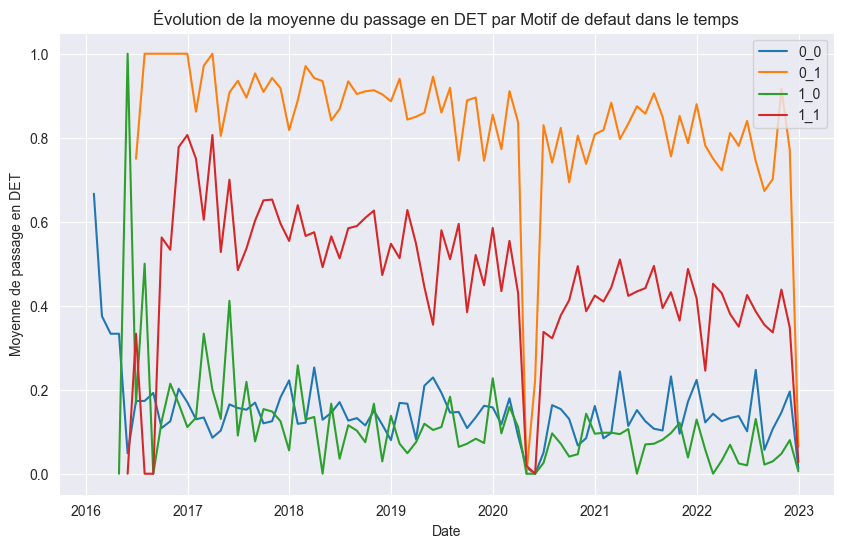

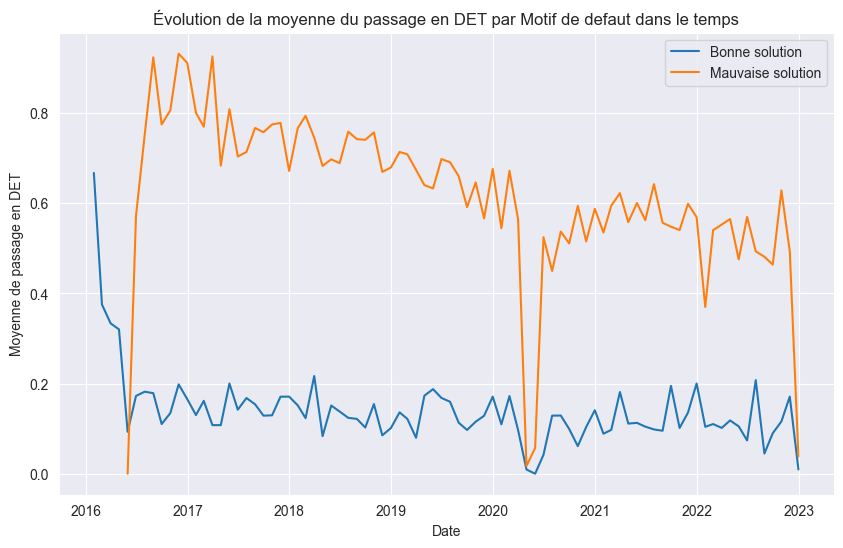

In [161]:
for col in df[['sol_echec','Solution_echec']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()

# regroup_natur_op

In [114]:
list_mean = []
for cat in df['regroup_natur_op'].unique():
    moyenne = df[df['regroup_natur_op']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['regroup_natur_op'].unique()
motif

0    Motif defaut
0  0.309621       3_travaux
1  0.340370         4_autre
2  0.278764  1_neuf_aco_acr
3  0.263620    2_rachat_sou

In [118]:
precaire = ['4_autre']
df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

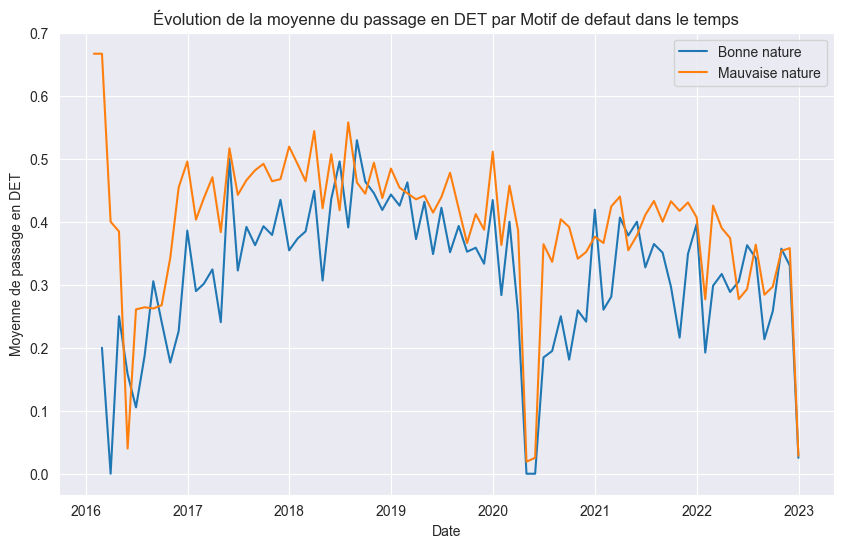

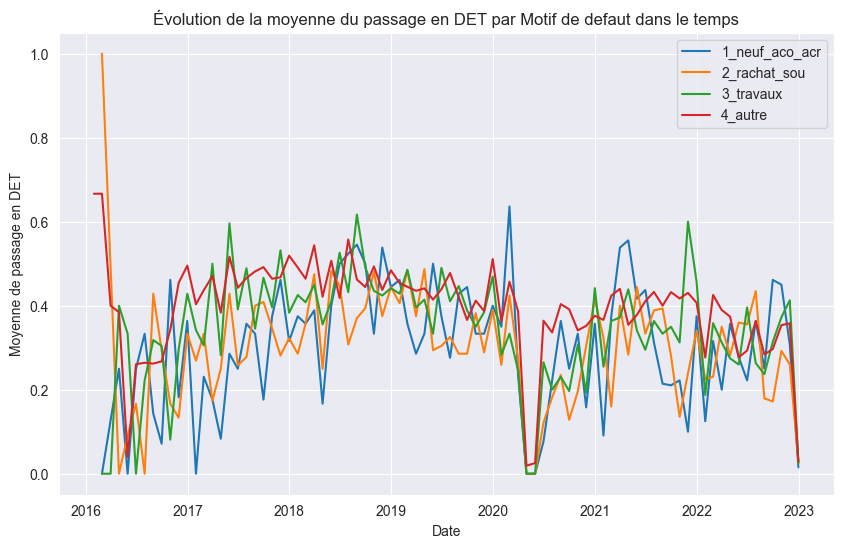

In [119]:
for col in df[['Nature_op','regroup_natur_op']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()

In [120]:
category_counts = df['Nature_op'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show() 


# CD_MTF_ENE_CTX

In [195]:
list_mean = []
for cat in df['CD_MTF_ENE_CTX'].unique():
    moyenne = df[df['CD_MTF_ENE_CTX']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_MTF_ENE_CTX'].unique()
motif

0  Motif defaut
0   0.001243         108.0
1   0.026319         102.0
2        NaN           NaN
3   0.001959         105.0
4   0.000000         110.0
5   0.012847         106.0
6   0.000000         107.0
7   0.000000         500.0
8   0.000000         999.0
9   0.000000         505.0
10  0.016193         111.0
11  0.000000         504.0
12  0.000000         101.0
13  0.000000         501.0
14  0.000000         100.0
15  0.000000         112.0
16  0.000000         508.0
17  0.000000         502.0

In [205]:
precaire = [102.0]
df['MTF'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')

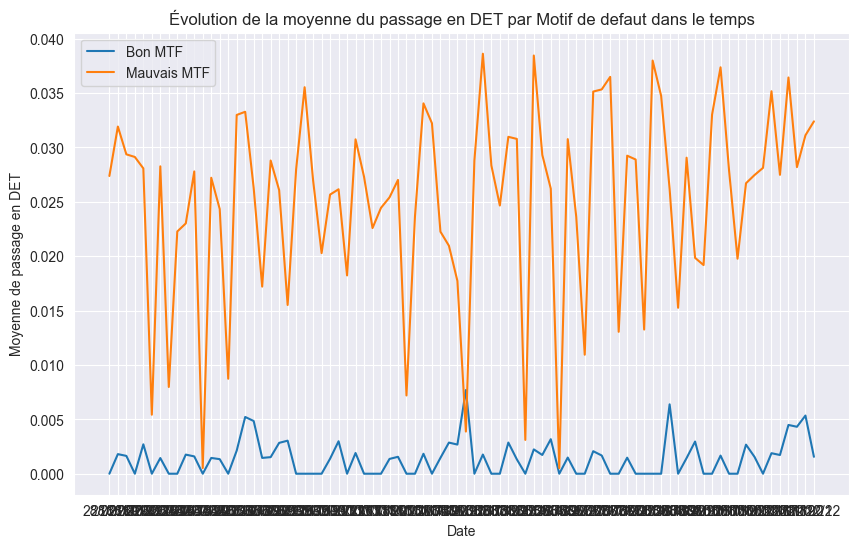

In [206]:
for col in df[['MTF']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()

In [207]:
category_counts = df['MTF'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show() 


# niv_gravite_mtf_dne

In [208]:
list_mean = []
for cat in df['niv_gravite_mtf_dne'].unique():
    moyenne = df[df['niv_gravite_mtf_dne']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['niv_gravite_mtf_dne'].unique()
motif

0  Motif defaut
0  0.025965           2.0
1       NaN           NaN
2  0.000282           1.0
3  0.014850           3.0

In [ ]:
precaire = [2.0]
df['Gravite'] = np.where(df['niv_gravite_mtf_dne'].isin(precaire), 'Grave', 'Pas grave')

# Correlation

In [159]:
condition = np.abs(df.select_dtypes(exclude = 'object').corr()['fl_pass_DET'])>0.05

df.select_dtypes(exclude = ['object','datetime']).loc[:,condition].drop(columns = ['fl_pass_DET', 'cum_dec', 'cum_rec','MR_arr']).columns

Index(['MT_CHA_PIP', 'FL_ETR', 'cum_frs_externes', 'MT_EAD_RESID',
       'fl_prise_de_gar', 'fam_ETH', 'fam_ENQ', 'fam_hyp', 'dat_dec_echec',
       'solution', 'fam_PCD', 'dtSRT1st', 'CD_MTF_ENE_CTX',
       'niv_gravite_mtf_dne', 'niv_gravite_mtf_dfs', 'dls_mep_entree_def',
       'nb_bienHOP', 'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'fl_def_ss_pass_CTX',
       'mt_dec_cum_IMP_tot', 'AMI', 'PTG', 'AGE_EMP2'],
      dtype='object')

# Discretisation variables numériques

In [179]:
df['MT_EAD_RESID'].value_counts()

MT_EAD_RESID
 0.00         7311
-14.59           5
-15.27           5
-6.93            5
-9.20            5
              ... 
 303.49          1
 146368.05       1
 24050.45        1
 30.42           1
 158018.75       1
Name: count, Length: 15126, dtype: int64

C:\Users\baheu\AppData\Local\Temp\ipykernel_19380\1008474574.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



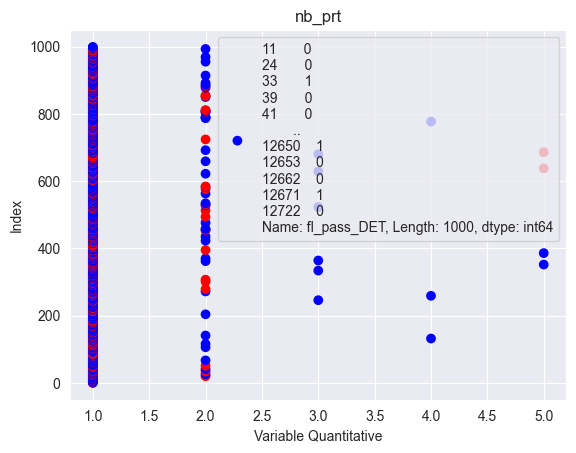

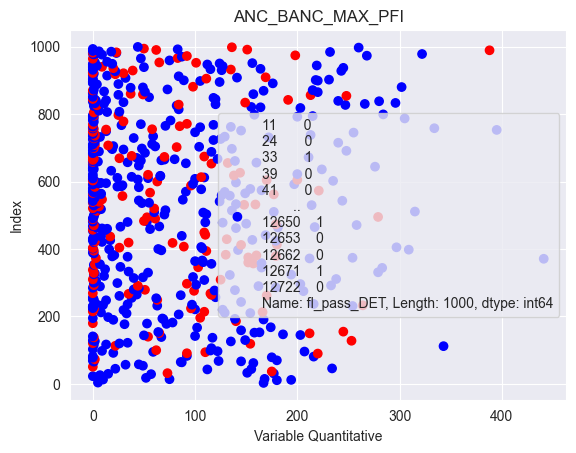

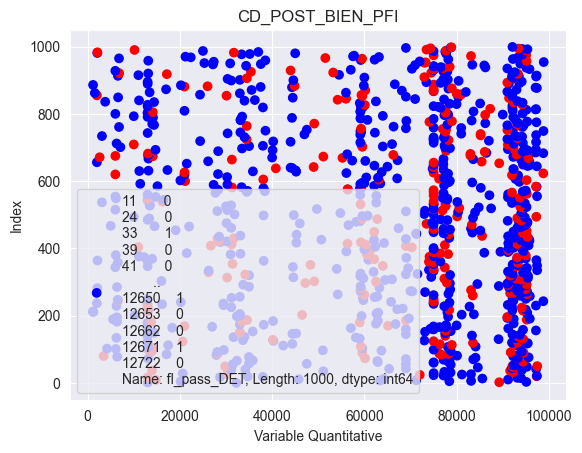

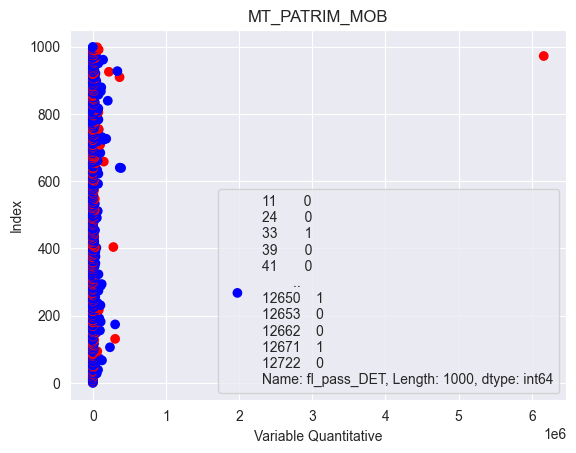

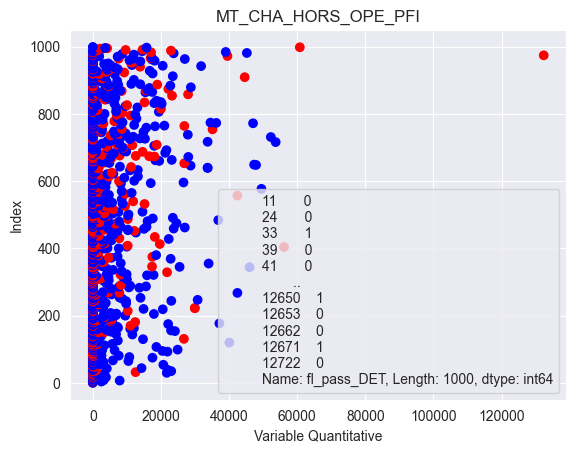

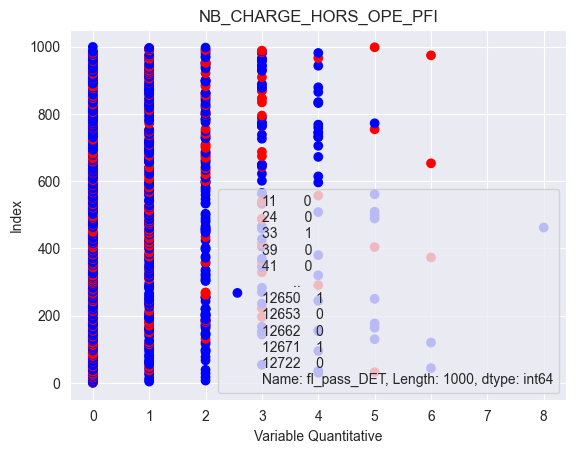

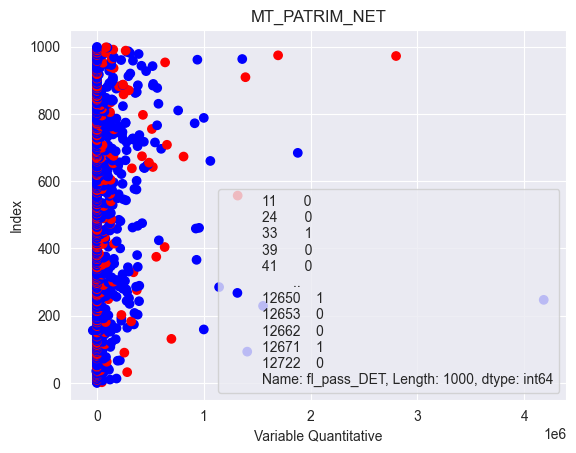

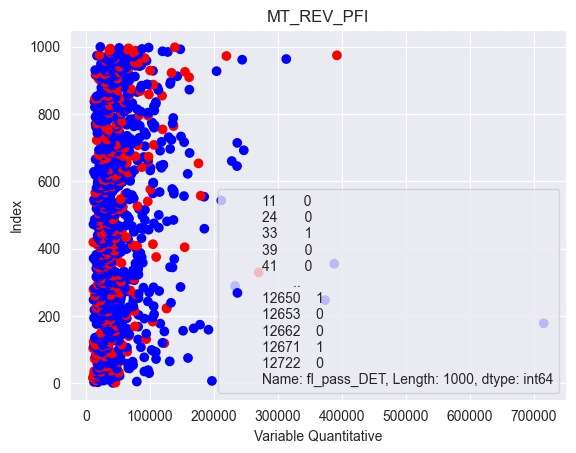

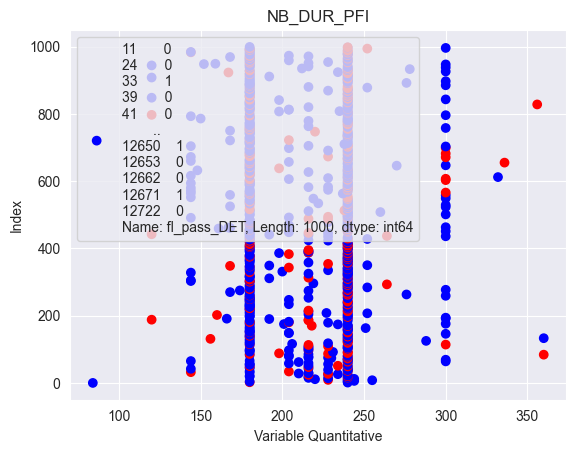

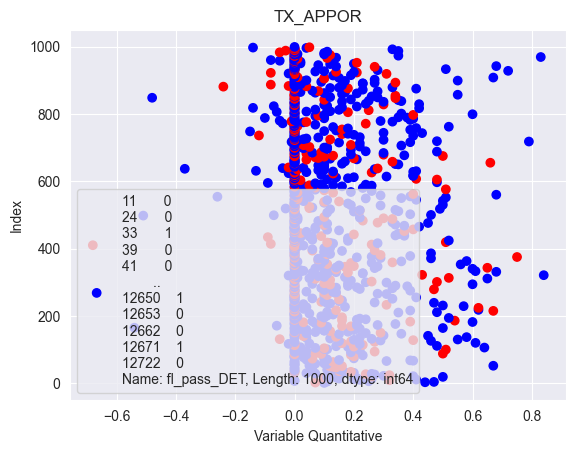

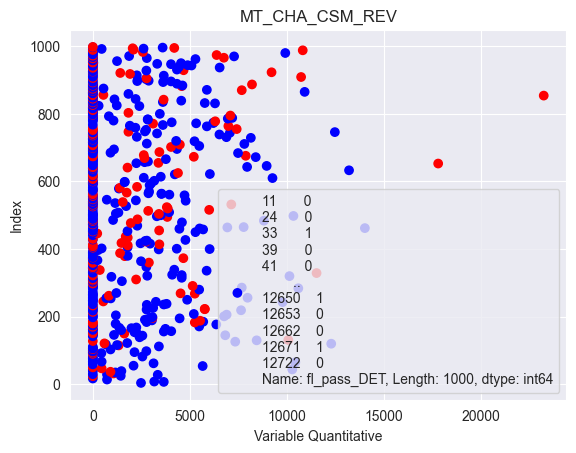

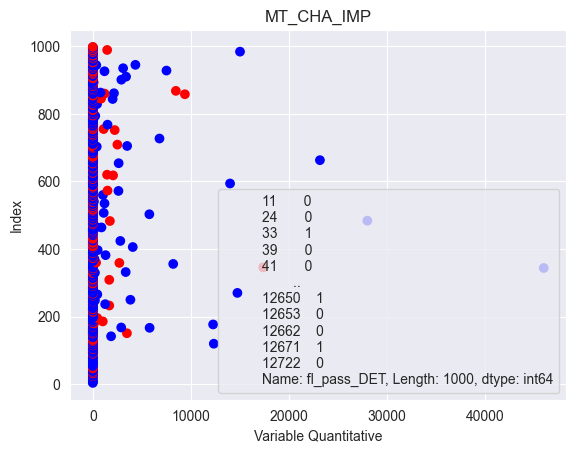

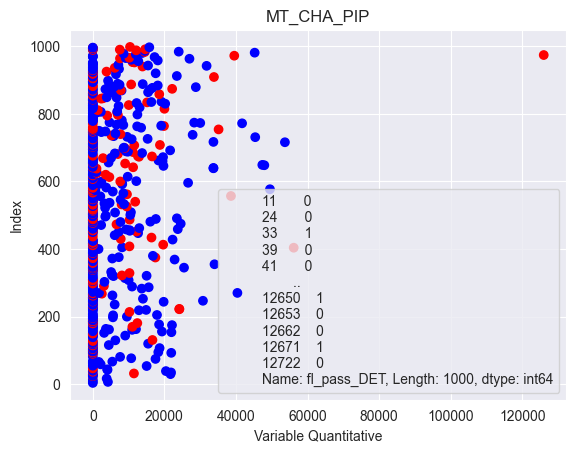

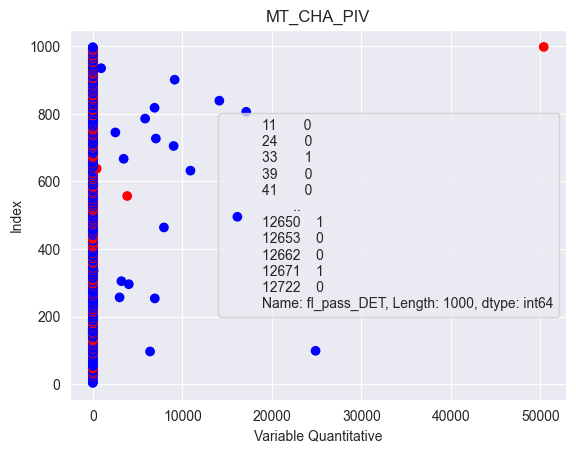

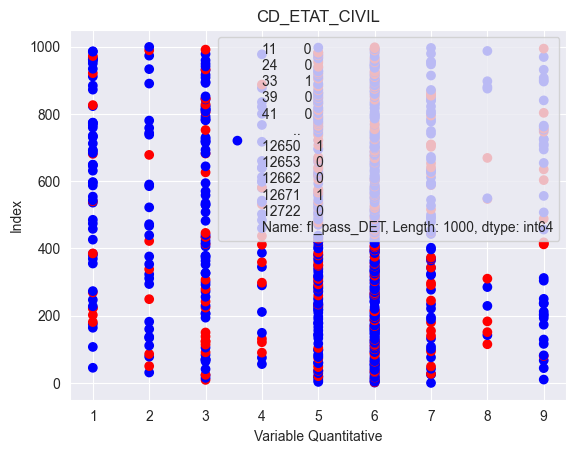

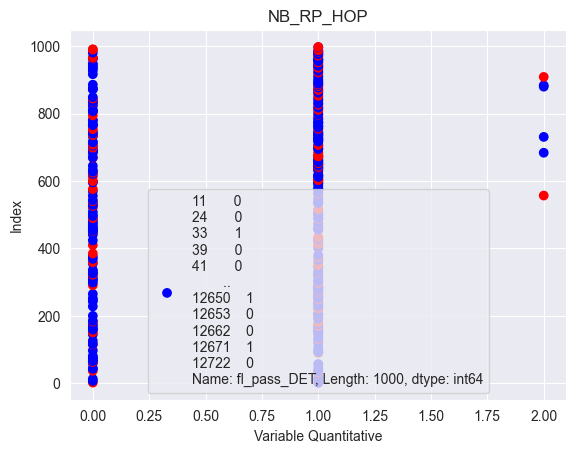

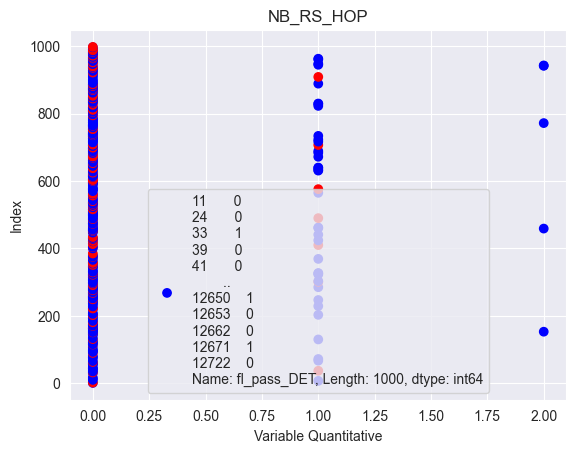

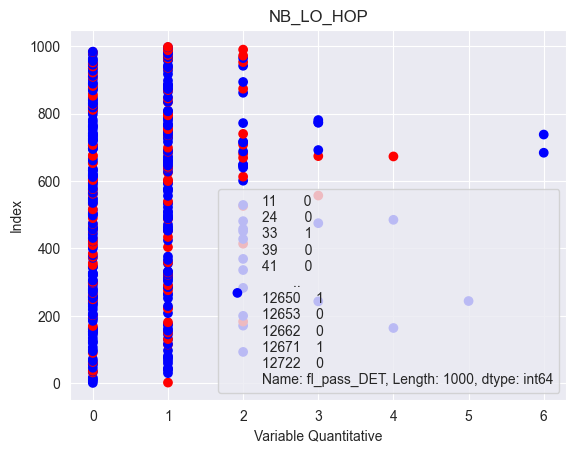

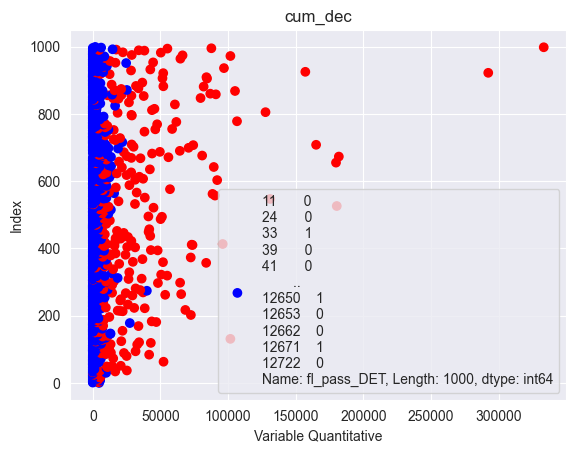

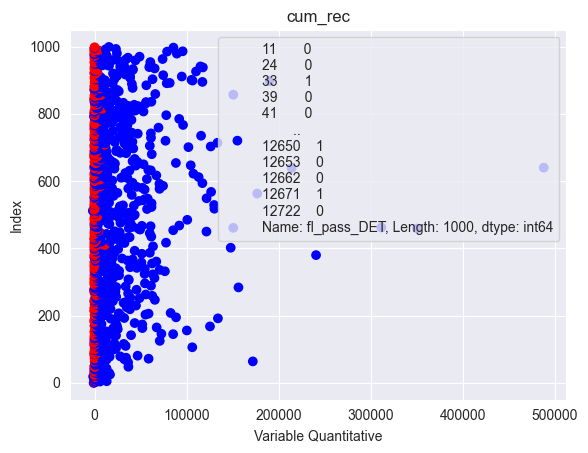

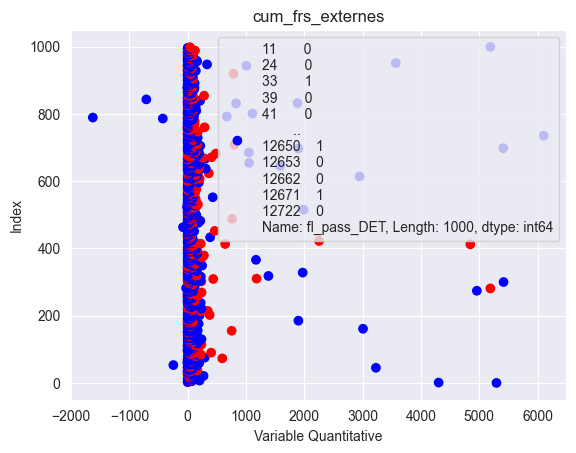

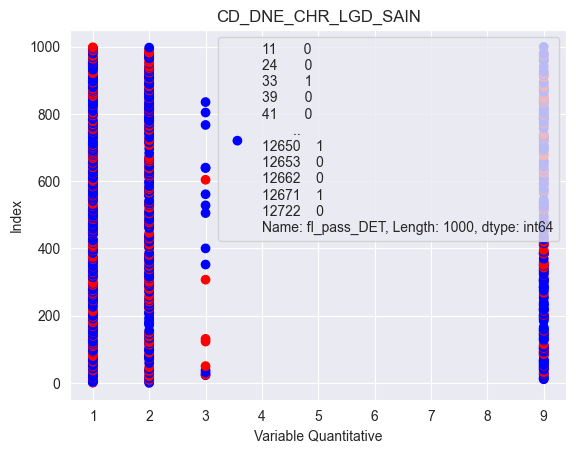

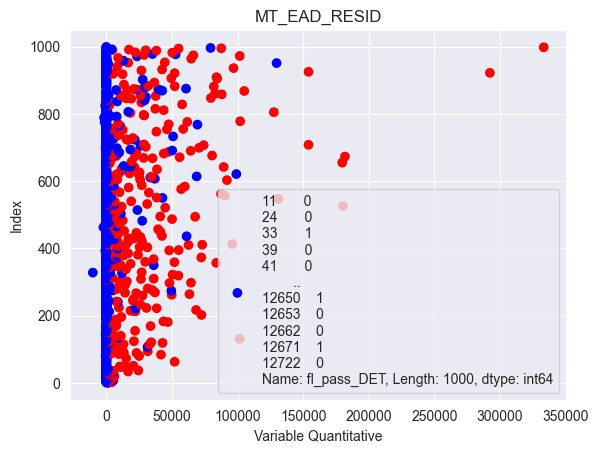

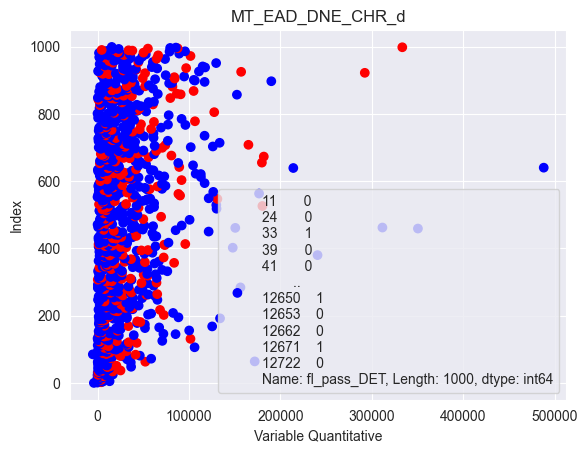

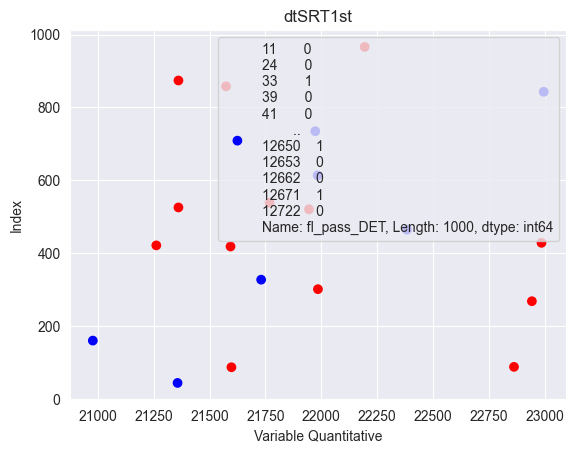

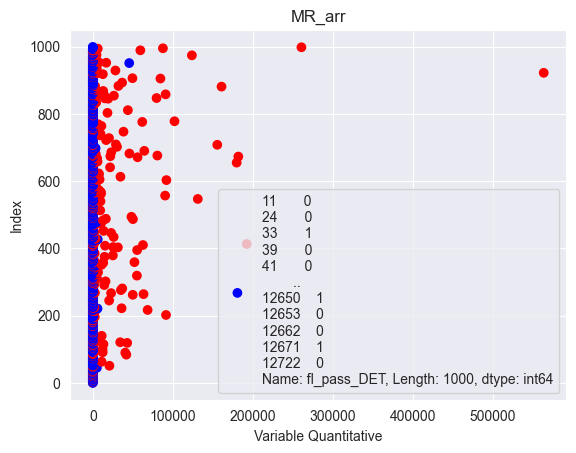

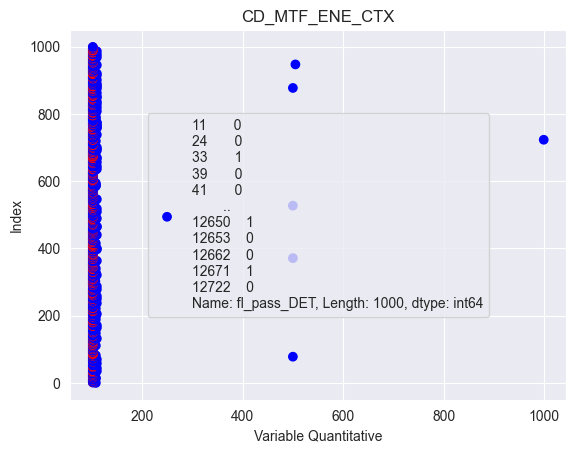

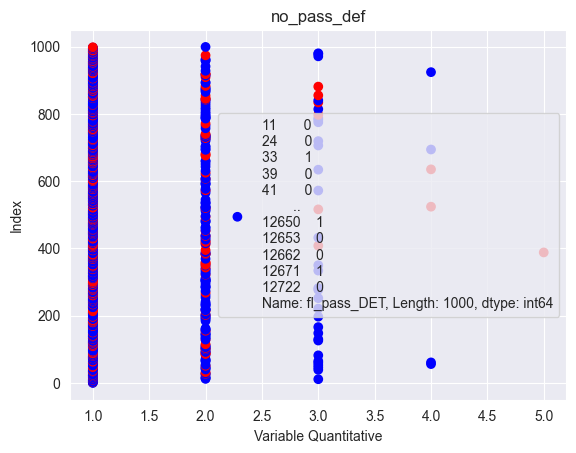

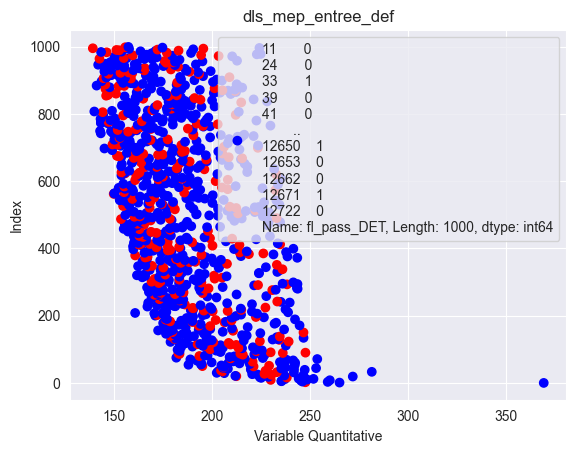

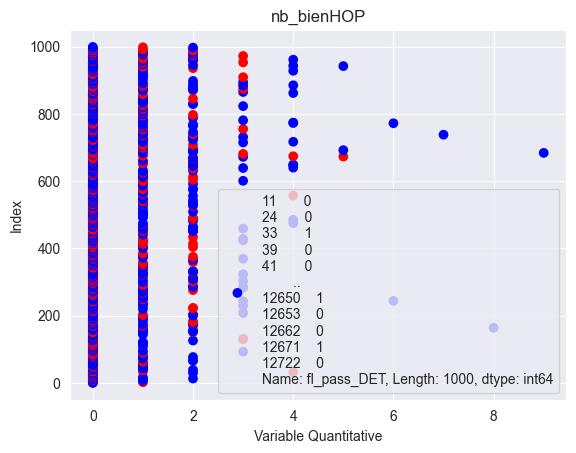

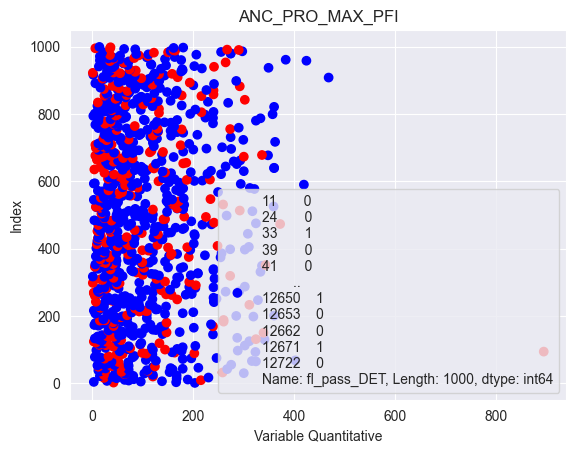

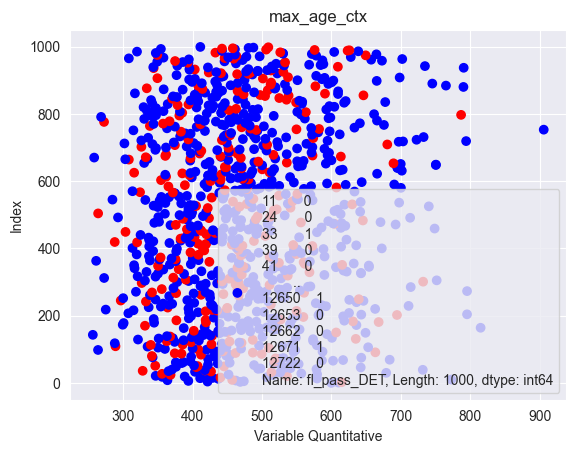

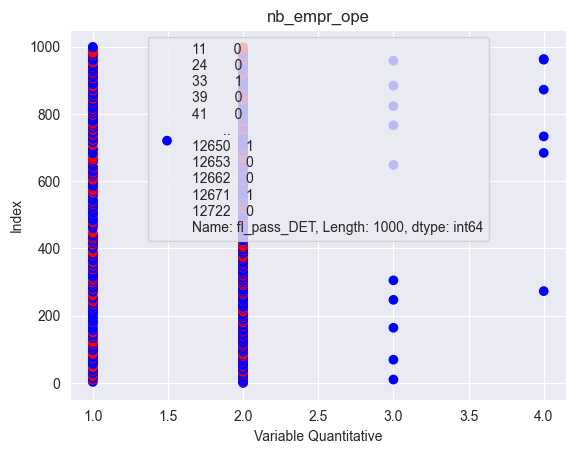

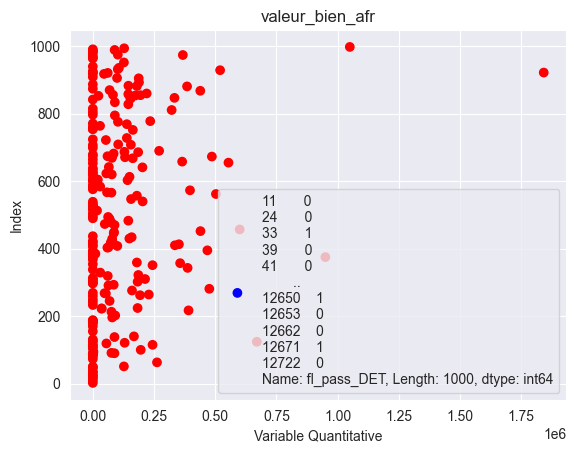

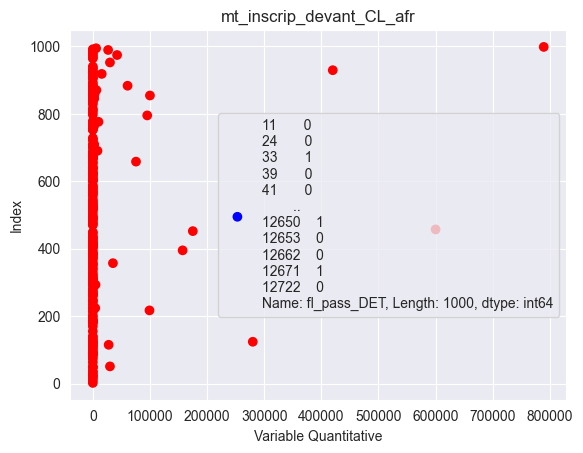

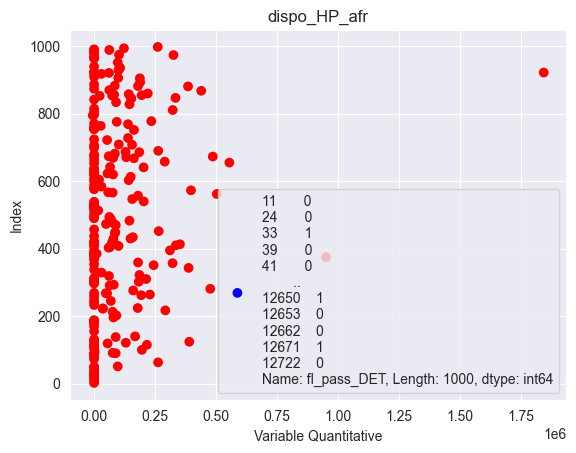

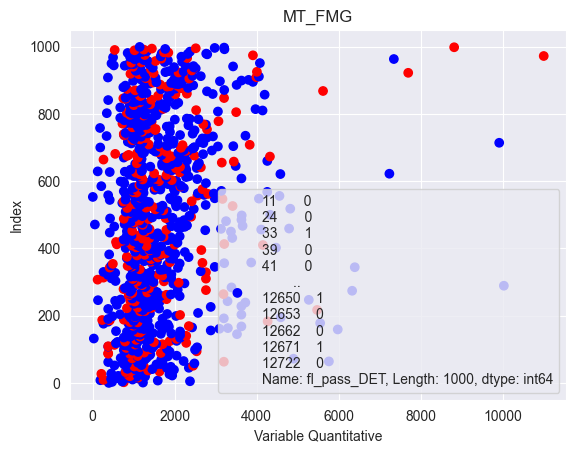

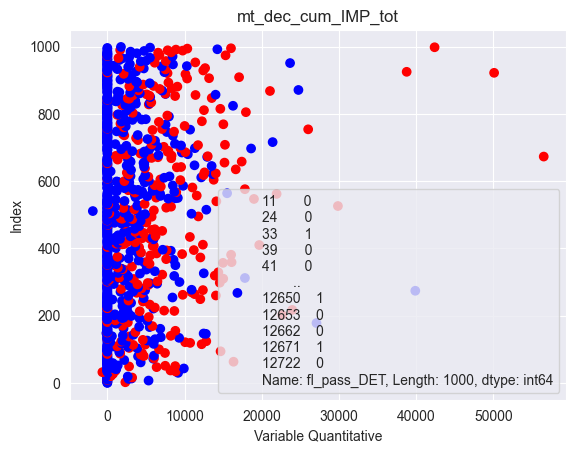

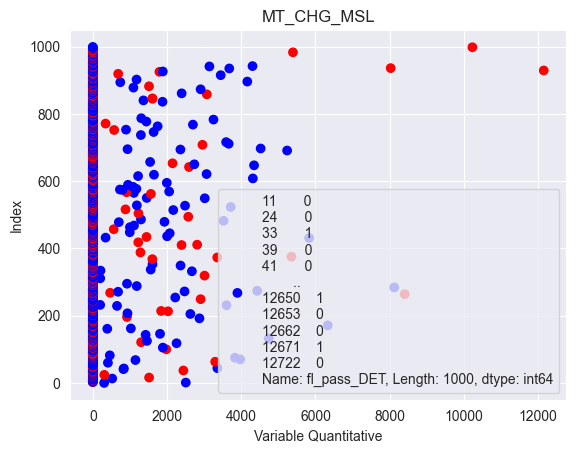

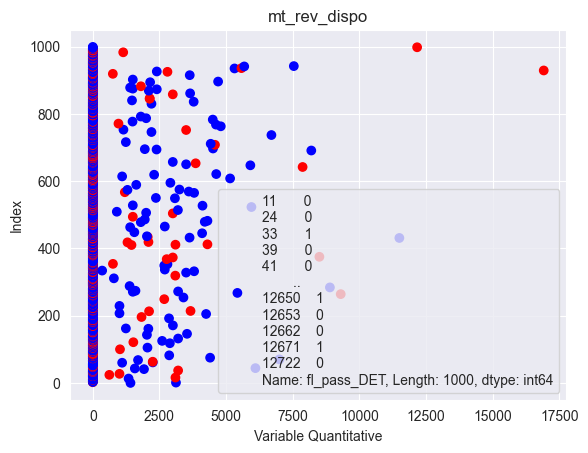

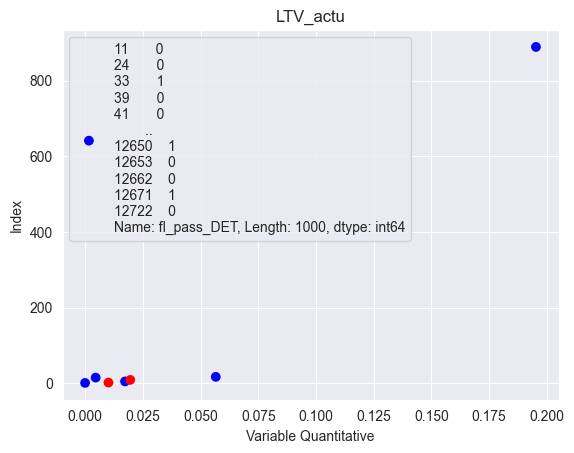

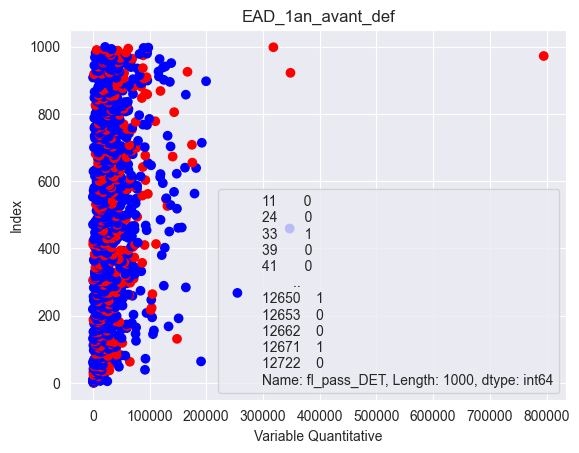

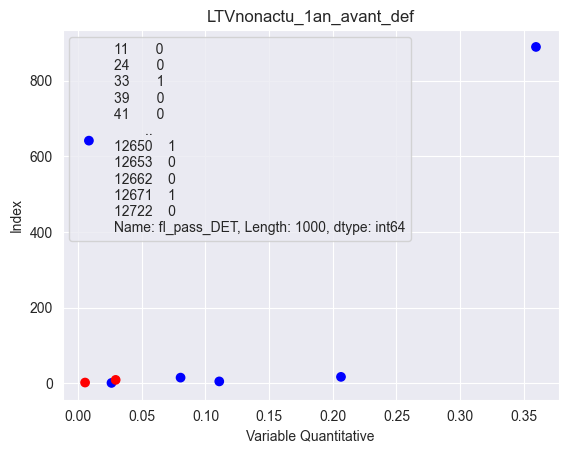

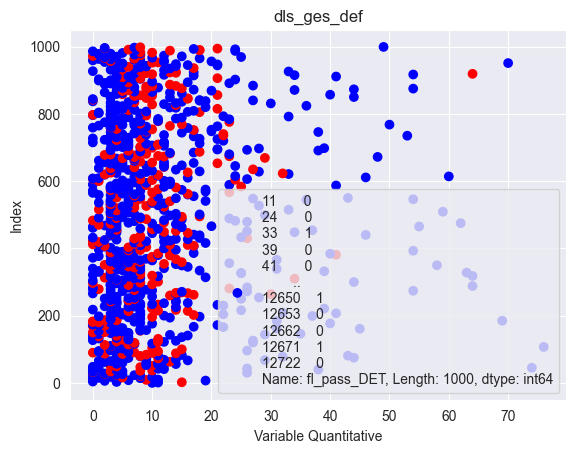

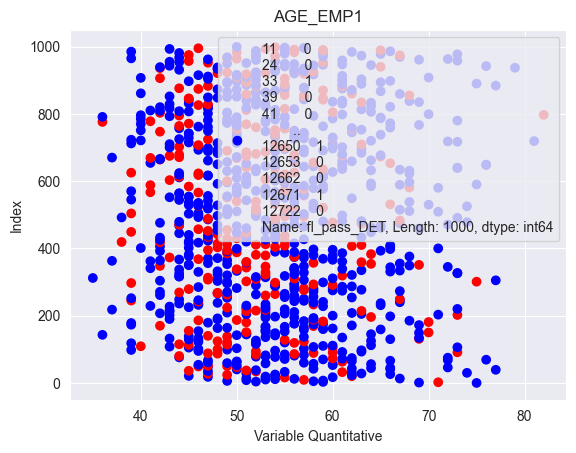

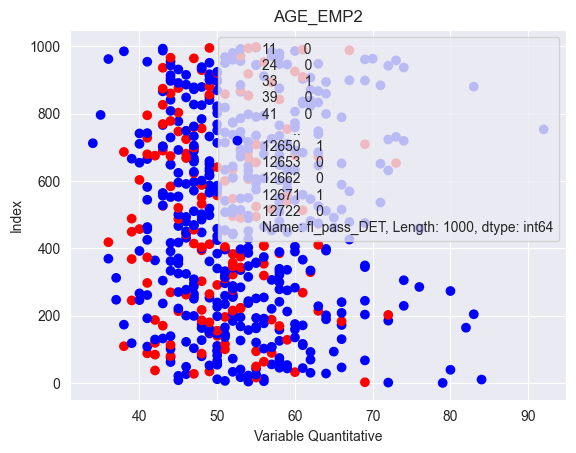

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [181]:
import matplotlib.pyplot as plt
df2 = df.iloc[:1000,:]
for col in df2.select_dtypes(include = 'number').columns : 
    if df[col].nunique()>3:
        colors = {1 : 'red', 0 : 'blue'}
        df2['Couleur'] = df2['fl_pass_DET'].map(colors)
        
        # Scatter plot
        plt.scatter(df2[col], range(len(df2)), c=df2['Couleur'], label=df2['fl_pass_DET'])
        
        # Ajouter des labels et un titre
        plt.xlabel('Variable Quantitative')
        plt.ylabel('Index')
        plt.title(col)
        
        # Afficher la légende
        plt.legend()
        
        # Afficher le plot
        plt.show()
    else:
        pass

KeyError: "['mt_dec_cum_imp_tot', 'ead_1an_avant_def', 'fam_eth', 'cd_dne_chr_lgd_sain_8.0'] not in index"